# 佐賀県の人口推移

In [1]:
import pandas
import requests
import io
import matplotlib.pyplot as plt
import japanize_matplotlib

/Users/tadaki/.pyenv/versions/3.9.4/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
#エクセル中の和暦ラベルと西暦の対応付け
wareki={'大正9年':1920, '昭和5年':1930, '10年':1935, '15年':1940,
        '20年':1945, '25年':1950, '30年':1955, '35年':1960,'40年':1965,
        '45年':1970, '50年':1975, '55年':1980, '60年':1985, '平成2年':1990,
        '7年':1995, '12年':2000, '17年':2005, '22年':2010, '27年':2015}

df中の指定された行のSeriesをプロット

In [3]:
def plotSub(yearList, df):
    population = prepareData(yearList,df)
    x=[y for y in range(len(yearList))]
    bottom = [0]*len(yearList)
    color = ['g', 'y', 'r']
    label = ['年少', '生産年齢', '老年']
    for k in range(3):
        plt.bar(x, population[k], bottom = bottom, 
            tick_label = yearList, color = color[k], label = label[k])
        for y in range(len(yearList)):
            bottom[y] += population[k][y]


データの調整

In [4]:
def prepareData(yearList, df):
    young = list()
    productive = list()
    elder = list()
    for k in wareki.keys():
        y = wareki[k]
        if y in yearList:
            young.append(df.iloc[13][k]/1000)
            productive.append(df.iloc[14][k]/1000)
            elder.append(df.iloc[15][k]/1000)
    population = [young,productive,elder]
    return population


作図前処理

In [5]:
def prePlot():
    plt.figure(figsize = (15, 15))
    plt.rcParams["font.size"] = 32
    plt.title('佐賀県の人口 (国勢調査から)') #図タイトル
    plt.xlabel('年')
    plt.ylabel('人口 (千人)')
    plt.ylim(0, 1200)

メイン

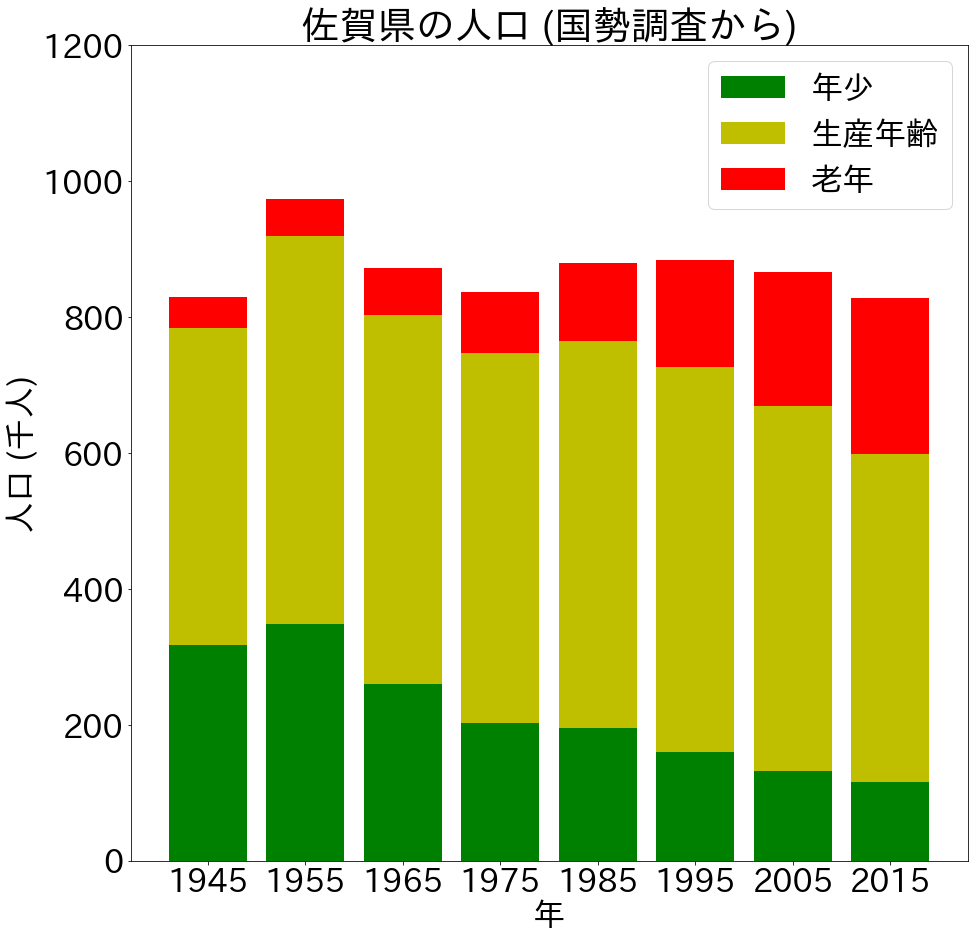

In [7]:
url = 'http://data.bodik.jp/dataset/77e0cc66-c15d-4473-b3df-2664fe8e2e63/resource/8dc71515-526a-4168-866c-05d2cc8dad7b/download/jinkou.xlsx'
#url = 'jinkou.xlsx'
#Excelの内容をDataFrameへ
data = pandas.read_excel(url, header = 3, usecols = 'C:V', 
    index_col = 19, skiprows = [4, 18, 27], skipfooter = 8) 
#print(data)
prePlot()

yearList = list()
year = 1945
while year < 2020:
    yearList.append(year)
    year += 10
plotSub(yearList, data)
plt.legend(loc = 'best') #凡例

plt.savefig('SagaPopulationBar.pdf') #画像保存
plt.show() #画像表示
